In [19]:
from pylab import *
%matplotlib inline
sys.path.insert(0, "../lib/")# add the library folder to the path I look for modules
from directed_random_graph import *# this is the function I wrote
from multiprocessing import Pool
import itertools
import pickle
import component
import latexify
def load_obj(name ):
    with open('dic-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [21]:
dic=load_obj('SCC')
data=dic['data']
ds=dic['ds']#note that here d+1 is the average out-degree of genes
c=dic['c']#note that here c+1 is the average out-degree of TFs
N1=dic['N1']
N2=dic['N2']

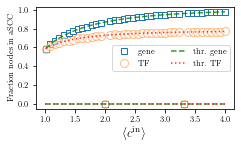

In [23]:
latexify.latexify(columns=2)
#cmap = plt.get_cmap('brg')
plot(1+ds,data[:,0]/N1,"s",mfc="w",label="gene")
plot(1+ds,data[:,1]/N2,"o",ms=8,mfc="w",label="TF",alpha=0.5)
#axvline(exp(c))
data_num=array([component.num_corrected(d,c,1).in_component for d in ds])
plot(1+ds,data_num[:,0],"--g",alpha=0.8,label = 'thr. gene')
plot([1,max(ds)+1],[0,0],"--g",alpha=0.8)
#plot(1+ds[ds>exp(c)-1],data_num[:,0][ds>exp(c)-1],"--r",alpha=0.8)

plot(1+ds,data_num[:,1],":r",alpha=0.8,label= 'thr. TF' )
#plot(1+ds[ds>exp(c)-1],data_num[:,1][ds>exp(c)-1],"--g",alpha=0.8)
plot([1,1+max(ds)],[0,0],":r",alpha=0.7)

xlabel("$\\langle c^{\mathrm{in}}\\rangle $",fontsize=13)
ylabel("Fraction nodes in aSCC")
#title("c="+str(c))
legend(ncol = 2)
tight_layout()
#savefig("non-linearSCC.pdf")

In [2]:
def SCC_nonlinear(BG,Genes,TFs,process=0):
    '''Return the subgraph in the SCC, and then removes TFs whose in degree is not the same as initially '''
    BG_filtered=BG.copy()
    BG_tf=dict(BG.in_degree(TFs))# dictionary of in degree for TF in the bipartite graph
    count=0
    while True:
        Gc= component.maximum_strongly_connected_component_subgraph(BG_filtered)
        #print(len(Gc),len(BG_filtered))
        #print(BG_filtered.nodes())
        if len(Gc)==len(BG_filtered):
            print("number of deletion iterations:",count)
            return BG_filtered,count
        count+=1
        
        Gc_G=set(Gc.nodes()).intersection(Genes)# set of genes in the giant cluster
        Gc_tf=dict(Gc.in_degree(TFs))# dictionary of in degree for TF in the SCC
        filtered={v for v,k in Gc_tf.items() if BG_tf[v]==k} # filtered dictionary of SCC if TF has same indegree as initially
        #BG_filtered.remove_nodes_from([n for n in BG_filtered if n not in set(filtered).union(Gc_G)])#remove TFs with wrond in-degree and Genes not in SCC
        BG_filtered=BG_filtered.subgraph(set(filtered).union(Gc_G)).copy()
        #print(set(filtered),Gc_G)

## Test on a large network

Procedure above consists in consecutive  node pruning. However, we observe that one iteration is usually enough. In fact, number of nodes returned by this procedure is consistent with the fraction of nodes in SCC as predicted by linear dynamics. To understand why I am exploring the properties of linear SCC.

In general non-linear SCC is very similar to linear SCC. The reason being is that SCC eliminates all TFs with out-degree 0, then it eliminates the predecessors genes if the out  degree of these genes is 1 (or they bind to other TFs not in SCC). If these genes had successors in SCC, they would belong in SCC. New TF will have out degree 0, and we keep eliminating like that.  We end up eliminating TF with low out degree ( see histogram of out degree of TF not in SCC). When this iterative procedure ends, the AND constrain is satisfied as well.

A very peculiar case is when a gene $i$ has a bidirectional link to a TF $\mu$ which is not in SCC. Other successors/predecessors of $i$ will be affected, and will produce the case of a gene not being in SCC, but with TF in SCC. This violate the AND condition, therefore TF will be eliminated.

## Fixed c

In [3]:
N1=50000
N2=50000
c=0.5
data=[]
counts=[]
ds=linspace(0.01,3,40)
for d in ds:
    _,BG=create_bipartite(N1,N2,d,c)
    TFs=arange(N1,N1+N2)
    Genes=arange(0,N1)
    SG,count=SCC_nonlinear(BG,Genes,TFs)
    data+=[[len(set(SG.nodes()).intersection(Genes)),len(set(SG.nodes()).intersection(TFs))]]
    counts+=[count]
data=array(data)

number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 2
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 27
number of deletion iterations: 1
number of deletion iterations: 3
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 3
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of deletion iterations: 1
number of

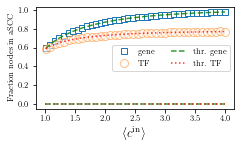

In [17]:
latexify.latexify(columns=2)
#cmap = plt.get_cmap('brg')
plot(1+ds,data[:,0]/N1,"s",mfc="w",label="gene")
plot(1+ds,data[:,1]/N2,"o",ms=8,mfc="w",label="TF",alpha=0.5)
#axvline(exp(c))
data_num=array([component.num_corrected(d,c,1).in_component for d in ds])
plot(1+ds,data_num[:,0],"--g",alpha=0.8,label = 'thr. gene')
plot([1,max(ds)+1],[0,0],"--g",alpha=0.8)
#plot(1+ds[ds>exp(c)-1],data_num[:,0][ds>exp(c)-1],"--r",alpha=0.8)

plot(1+ds,data_num[:,1],":r",alpha=0.8,label= 'thr. TF' )
#plot(1+ds[ds>exp(c)-1],data_num[:,1][ds>exp(c)-1],"--g",alpha=0.8)
plot([1,1+max(ds)],[0,0],":r",alpha=0.7)

xlabel("$\\langle c^{\mathrm{in}}\\rangle $",fontsize=13)
ylabel("Fraction nodes in aSCC")
#title("c="+str(c))
legend(ncol = 2)
tight_layout()
#savefig("non-linearSCC.pdf")
